<a href="https://colab.research.google.com/github/RemenKhullar/Bulldozers-price-prediction-Regression-Problem/blob/main/Bulldozer_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bulldozer Sales Price Prediction Problem

## Problem Defination:
To predict the saleprice of bulldozers in the future given its characteristics?

## Data source:
The Data is downloaded from kaggle Bluebook for bulldozers:
    https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data is divided into three parts:

1. Train.csv is the training set, which contains data through the end of 2011.

2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012

3. Test.csv is the test set which, contains data from May 1, 2012 - November 2012

In [2]:
#importing all EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Features


In [3]:
features=pd.read_excel('https://drive.google.com/u/0/uc?id=1MFkwURLIRyKifm6jVndpsHPx4X6Scnkb&export=download',usecols=['Variable','Description'])
pd.set_option('display.max_colwidth', None)
display(features)

,Variable,Description
0,SalesID,unique identifier of a particular sale of a machine at auction
1,MachineID,identifier for a particular machine; machines may have multiple sales
2,ModelID,identifier for a unique machine model (i.e. fiModelDesc)
3,datasource,source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs.
4,auctioneerID,"identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale
7,UsageBand,"value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Regression_project_Bulldozers_price')
import env

In [6]:
#load the data
df=pd.read_csv('/content/drive/MyDrive/Regression_project_Bulldozers_price/Data/TrainAndValid.csv',low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()# Different Stats about numerical attributes

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

**The saledate column is in string from.We have to convert it in timeseries object to use dates easily.** 

In [9]:
df.saledate=pd.to_datetime(df.saledate)

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
#Now sorting the data according to daates
df.sort_values(by='saledate',ascending=True,inplace=True)

# 1. Exploratory Data Analysis

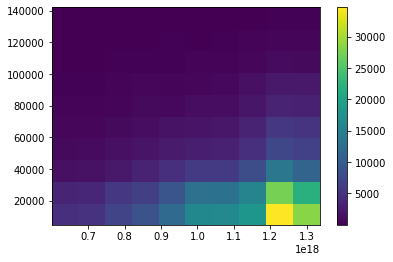

In [12]:
#plot a scatter betwween sale date and sale price
plt.hist2d(df['saledate'],df['SalePrice'])
plt.colorbar()
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/heatmap dist of saleprice vs sale date.png')

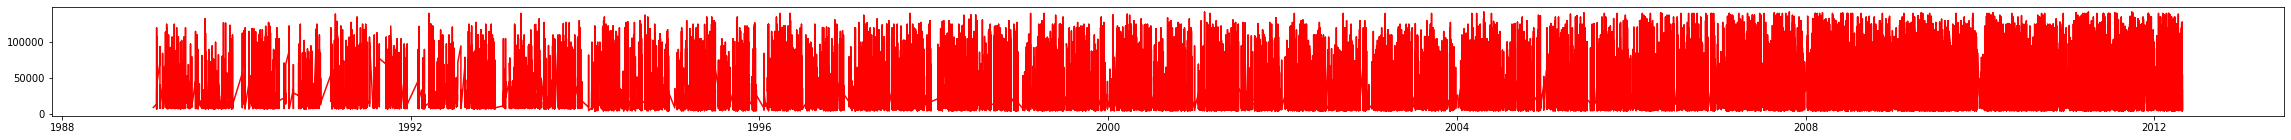

In [13]:
plt.figure(figsize=(40,2))
plt.plot(df.saledate,df.SalePrice,'r-')
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/line chart saleprice vs saledate.png')

**A pattern can be seen in the plot of sale price vs saledate with seasonal breaks in the sales**

**The 2d histogram or heatmap is too clutterd to gain any insights hence we will will do a scatter plot with a few samples of size=2000**

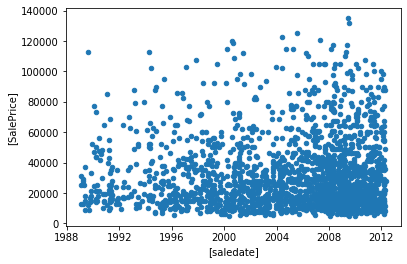

In [14]:
df.sample(n=2000).plot.scatter(['saledate'],['SalePrice'])
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/scatter plot saleprice vs saledate(2000 ssamples).png')

**It can be seen that sales have been increasing with years.**

Lets see the distribution of sales price.

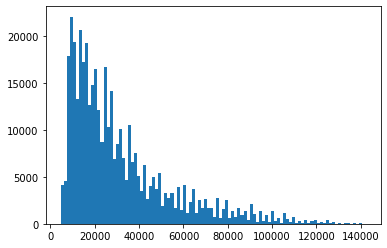

In [15]:
plt.hist(df.SalePrice,bins=100)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/saleprice distribution.png');

Most of sale prices are between 20,000 to 60,000

In [16]:
df['SaleYear']=df.saledate.dt.year
df['SaleMonth']=df.saledate.dt.month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


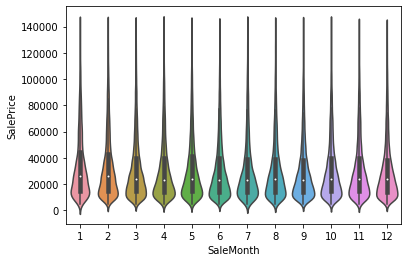

In [17]:
#lets see sale of bulldozers over the months
sns.violinplot(df.SaleMonth,df.SalePrice)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Saleprice dist over months violin.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


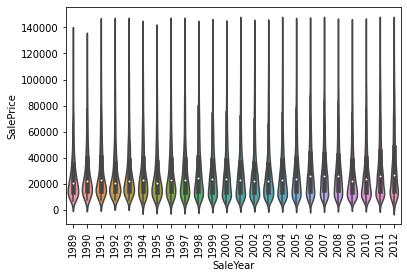

In [18]:
#yearly sale
plt.gcf().figsize=(20,20)
sns.violinplot(df.SaleYear,df.SalePrice)
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Saleprice yearly dist violin.png');

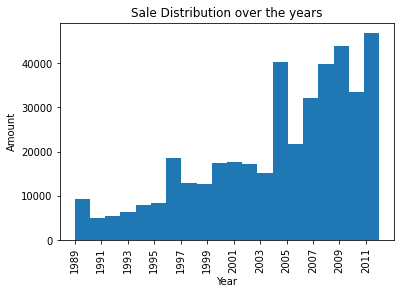

In [19]:
#districution over the year
plt.hist(df.SaleYear,bins=20)
plt.gca().set(title='Sale Distribution over the years',ylabel='Amount',xlabel='Year')
plt.xticks(np.arange(1989,2012,2),rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Sale Distribution over the years.png');

**It can be seen that the sales have increased over the years.**

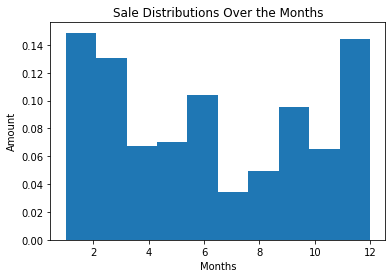

In [20]:
#distribution over months
plt.hist(df.SaleMonth,density=True)
plt.gca().set(title='Sale Distributions Over the Months',xlabel='Months',ylabel='Amount')
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Sale Distributions Over the Months.png');


**It can be seen that most of the sales are in first and last quarter of the years.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


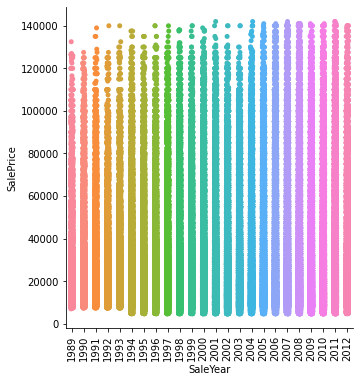

In [21]:
sns.catplot('SaleYear','SalePrice',data=df)
plt.xticks(rotation=90);

**It can be seen that Number of sales more expensive models has increased or it can also be said that more expensive models have been introduced over the years.
Also It seems that since 1994 some less expensive models have also been introduced or price of some models may have been reduced.**

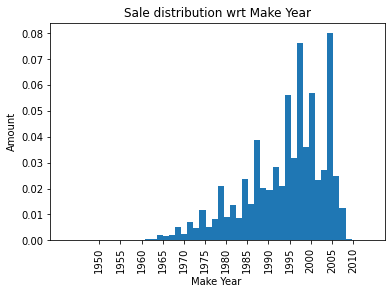

In [22]:
#Lets see distribution of make Year
#leaving the outliers
plt.hist(df.YearMade[df.YearMade>1940],density=True,bins=50)
plt.gca().set(title='Sale distribution wrt Make Year',ylabel='Amount',xlabel='Make Year ')
plt.xticks(np.arange(1950,2013,5),rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Sale distribution wrt Make Year.png');

**It can be seen that most of the bulldozers sold are made in 1995 to 2000 and 2005 to 2010**

Lets see number of different values in each attribute.

In [23]:
for x in df.columns:
    print(df[x].value_counts())

6299644    1
1360435    1
1417759    1
2378274    1
1327651    1
          ..
4320616    1
2221417    1
2227562    1
4312428    1
6299652    1
Name: SalesID, Length: 412698, dtype: int64
25000.0    7892
20000.0    7678
15000.0    7568
26000.0    7176
16000.0    7147
           ... 
48250.0       1
23900.0       1
49750.0       1
40900.0       1
25300.0       1
Name: SalePrice, Length: 954, dtype: int64
2283592    48
2285830    44
1896854    40
1746392    34
2268800    31
           ..
1434392     1
1436441     1
1438490     1
1440539     1
603993      1
Name: MachineID, Length: 348808, dtype: int64
4605     5348
3538     4976
3170     4364
4604     4296
3362     4186
         ... 
14500       1
18214       1
36019       1
11431       1
22923       1
Name: ModelID, Length: 5281, dtype: int64
132    260776
136     75491
149     33325
121     25191
172     17914
173         1
Name: datasource, dtype: int64
1.0     192773
2.0      57441
3.0      30288
4.0      20877
99.0     12042
6.0     

**From the Value counts we can select the attributes which be used as categorical features.Some of the important categorical features can be:**

1.ProductSize

2.ProductGroup

3.Drive_system

4.Transmission

5.Tire_Size

6.Track_Type

7.Grouser_Type

8.Blade_Type

9.Differential_Type

10.Steering_Controls


### Sales Price vs Product Size

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


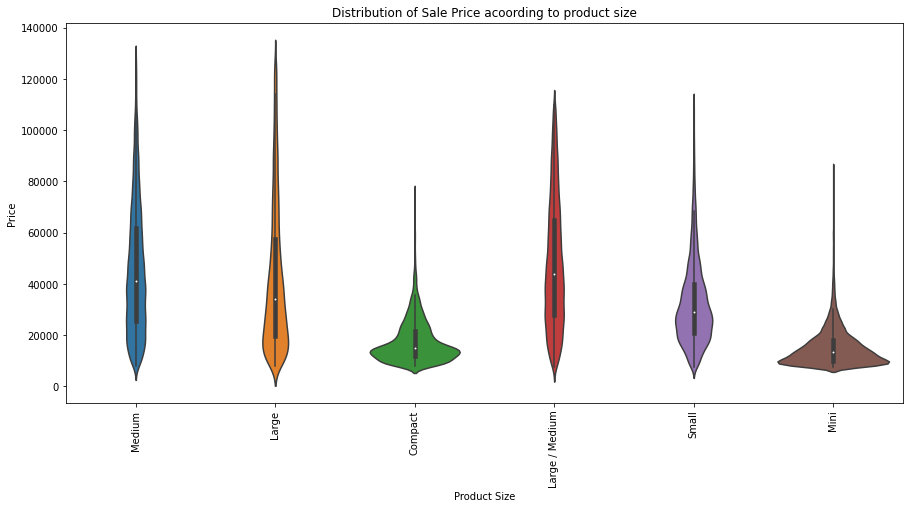

In [24]:
plt.figure(figsize=(15,7))
sns.violinplot(df.ProductSize,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to product size',xlabel='Product Size',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to product size.png');

### Sales Price vs Product Group

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


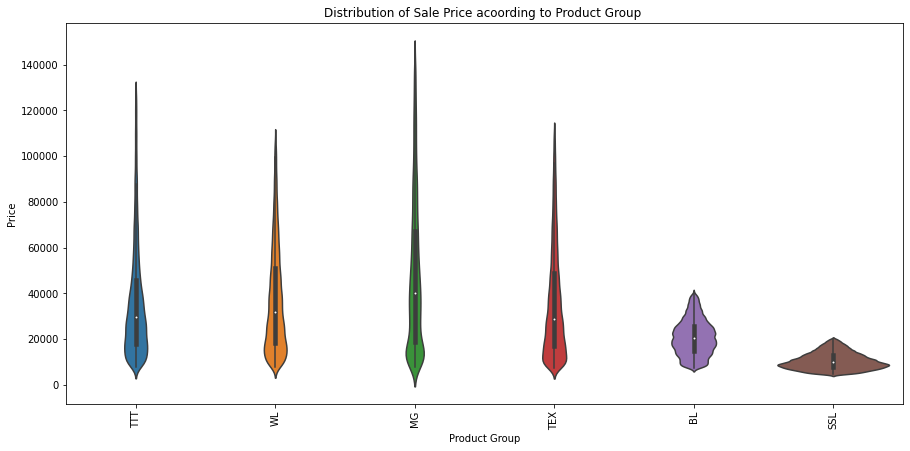

In [25]:
plt.figure(figsize=(15,7))
sns.violinplot(df.ProductGroup,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Product Group ',xlabel='Product Group',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Product Group.png');

### Sales Price vs Drive System

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


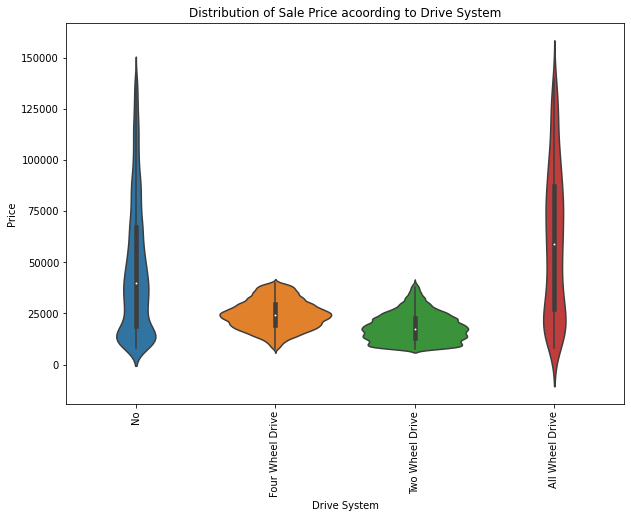

In [26]:
plt.figure(figsize=(10,7))
sns.violinplot(df.Drive_System,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Drive System',xlabel='Drive System',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Drive System.png');

### Sale Price vs Transmission

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


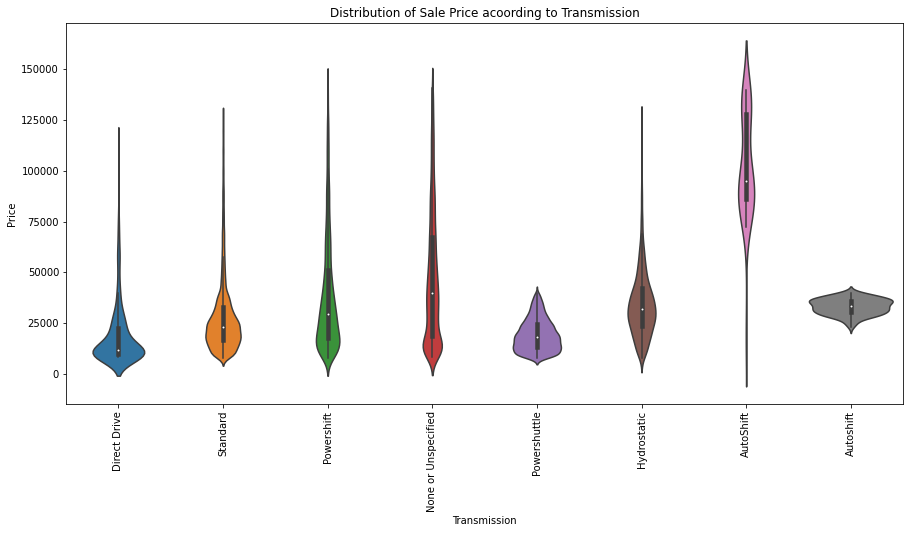

In [27]:
plt.figure(figsize=(15,7))
sns.violinplot(df.Transmission,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Transmission',xlabel='Transmission',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Transmission.png');

### Sale Price vs Tire Size

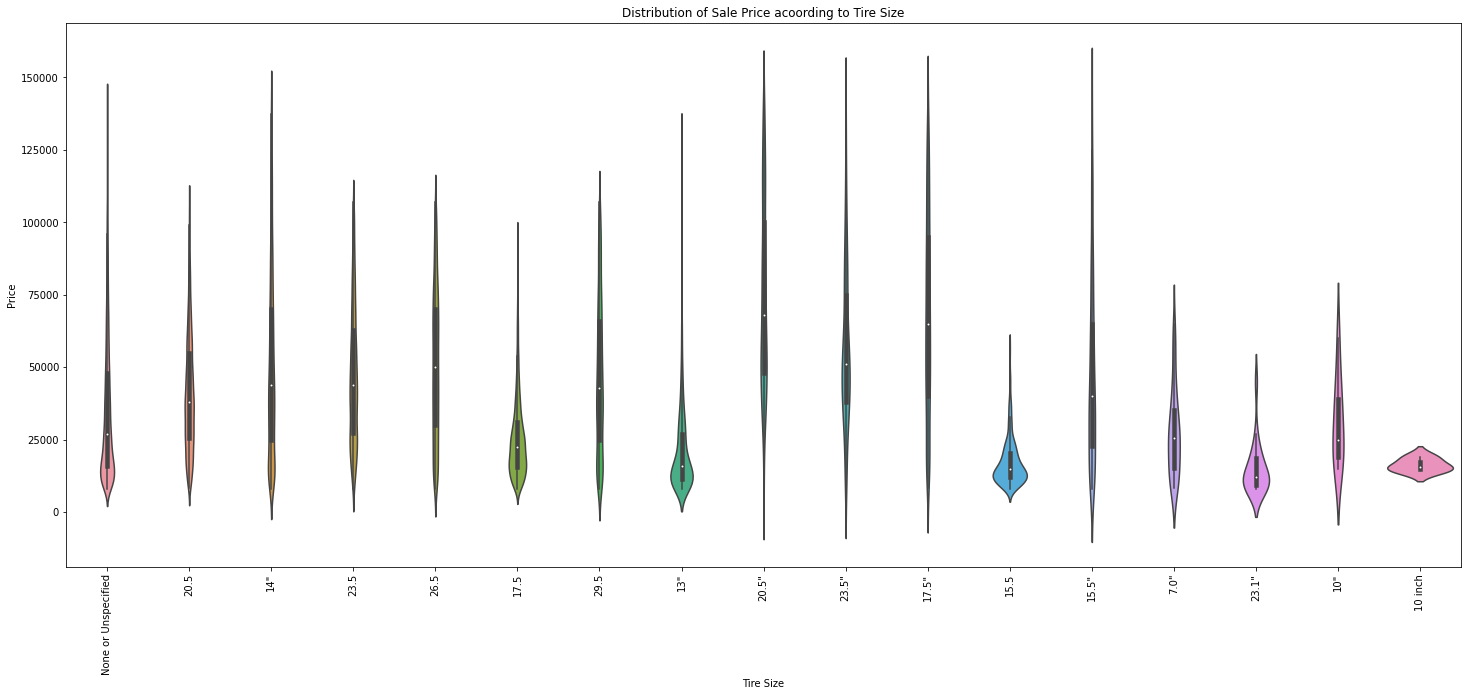

In [28]:
plt.figure(figsize=(25,10))
sns.violinplot(x=df.Tire_Size,y=df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Tire Size',xlabel='Tire Size',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Tire Size.png');

### Sales Price vs Track type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


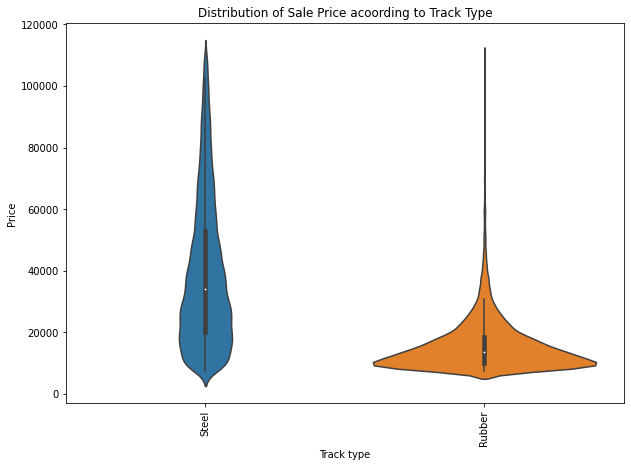

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(df.Track_Type,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Track Type',xlabel='Track type',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Track Type.png');

### Sales Price vs grouser type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


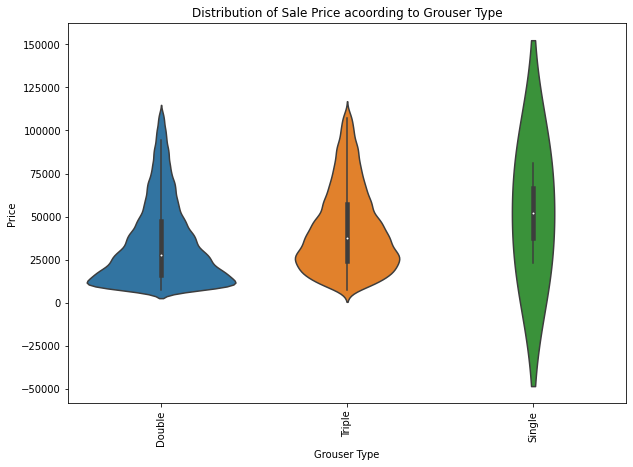

In [30]:
plt.figure(figsize=(10,7))
sns.violinplot(df.Grouser_Type,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Grouser Type',xlabel='Grouser Type',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Grouser Type.png');

### Sales Price vs Blade Type  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


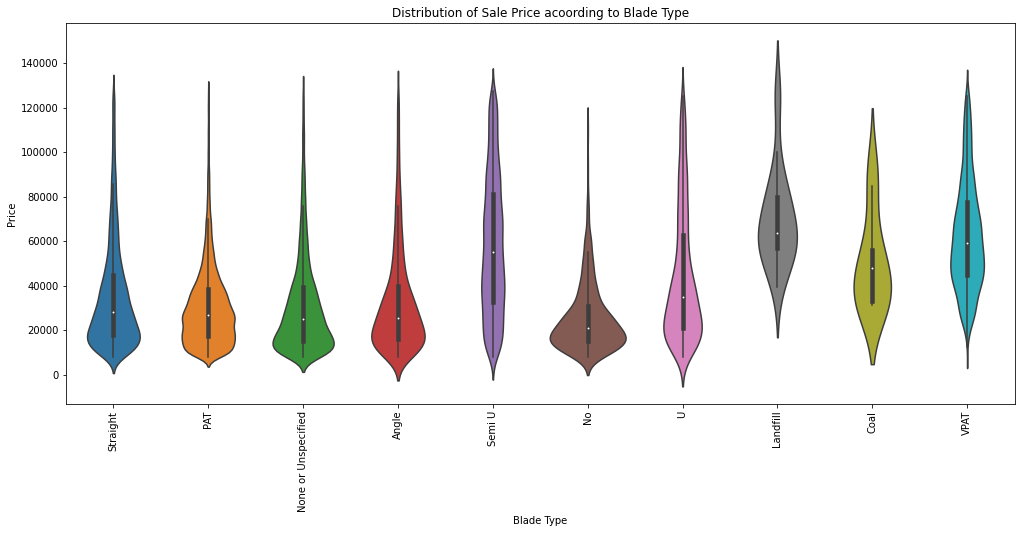

In [31]:
plt.figure(figsize=(17,7))
sns.violinplot(df.Blade_Type,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Blade Type',xlabel='Blade Type',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Blade Type.png');

### Sale Price vs Differential Control

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


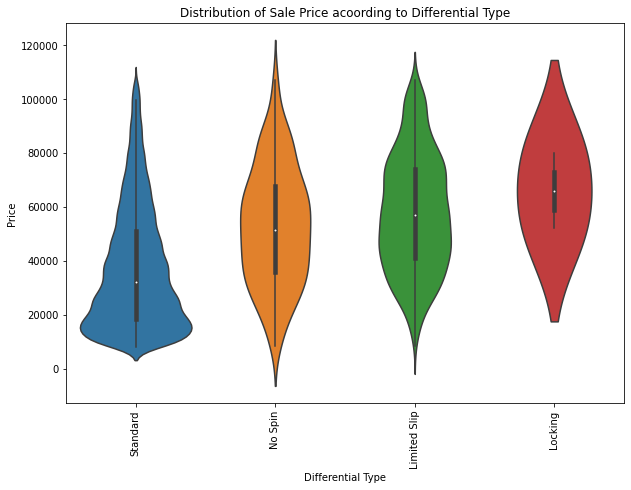

In [32]:
plt.figure(figsize=(10,7))
sns.violinplot(df.Differential_Type,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Differential Type',xlabel='Differential Type',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Differential Type.png');

### Sale Price vs Steering Control type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


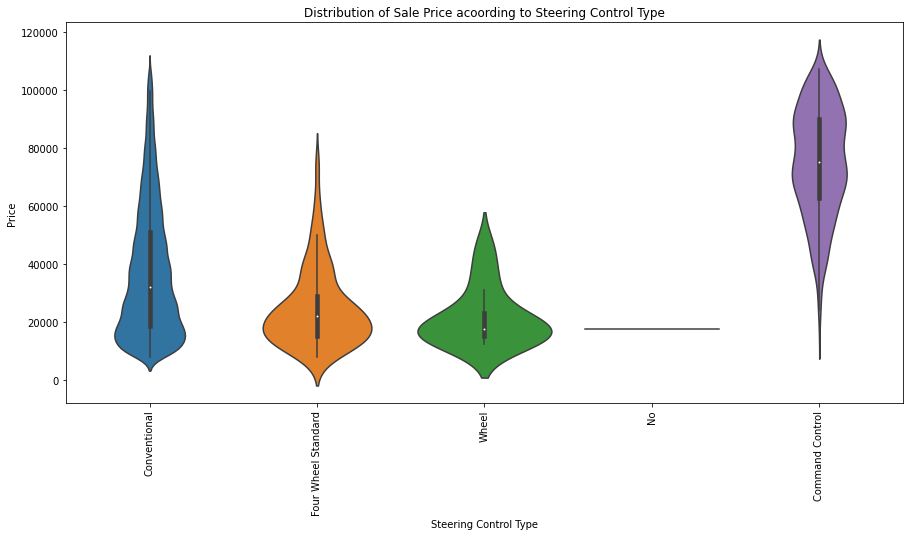

In [33]:
plt.figure(figsize=(15,7))
sns.violinplot(df.Steering_Controls,df.SalePrice)
plt.gca().set(title='Distribution of Sale Price acoording to Steering Control Type',xlabel='Steering Control Type',ylabel='Price')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Distribution of Sale Price acoording to Steering Control Type.png');

### Getting Correlation between different attributes.But first we have to change Non-numerical data to numerical.

In [34]:
df=df.apply(lambda x:x.factorize()[0])

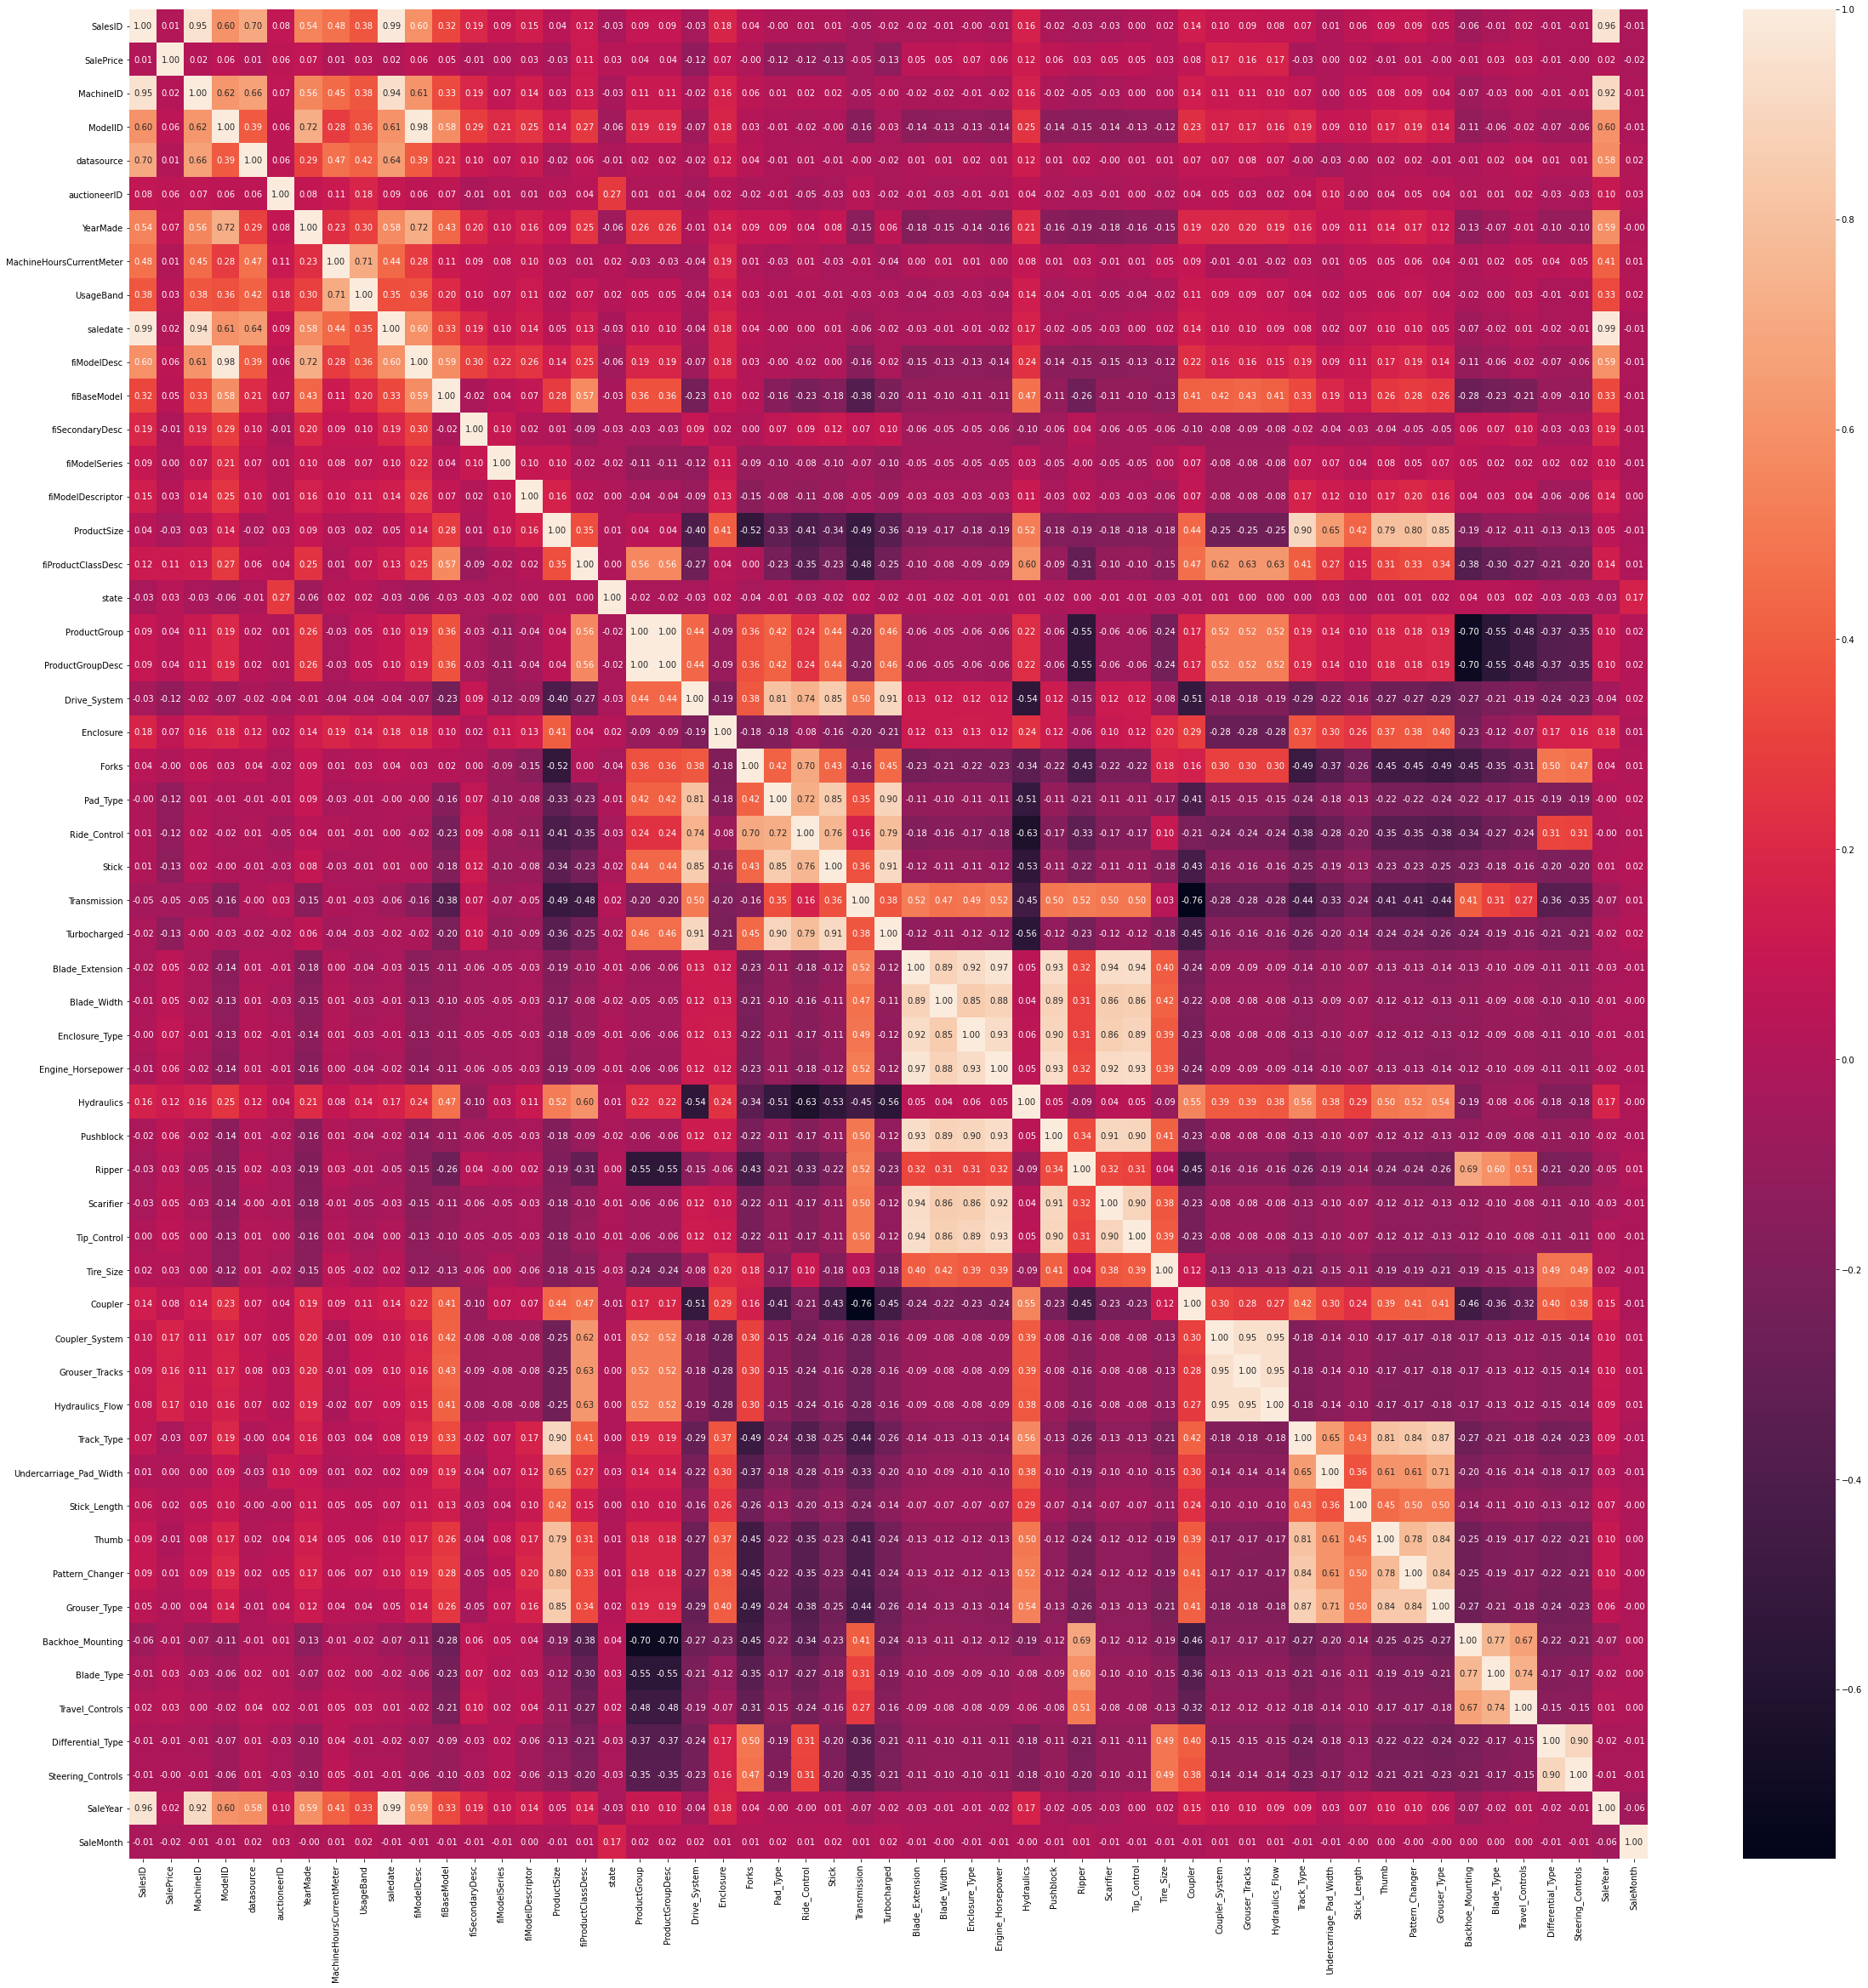

In [35]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Correlation matrix.png');

In [36]:
df.corr() #correlation between different variables 
df.to_csv('/content/drive/MyDrive/Regression_project_Bulldozers_price/Result/correlation matrix values.csv')

# 2.Preprocessing and getting the Data ready

Before we start modelling wwe have to check for missing data as well as convert object type categorical features in to numerical type.Hence we have to make our data ready for modellling.
This will be done in two Steps:
1. Imputation
2. Encoding


### Loading the data again divided into training, Validation and Test sets

In [37]:
df_train=pd.read_csv('/content/drive/MyDrive/Regression_project_Bulldozers_price/Data/Train/Train.csv',parse_dates=['saledate'],low_memory=False)
df_valid=pd.read_csv('/content/drive/MyDrive/Regression_project_Bulldozers_price/Data/Valid.csv',parse_dates=['saledate'],low_memory=False)
df_val_sol=pd.read_csv('/content/drive/MyDrive/Regression_project_Bulldozers_price/Data/ValidSolution.csv',usecols=['SalesID','SalePrice'])
df_valid=pd.merge(df_valid,df_val_sol,on=['SalesID'])
df_test=pd.read_csv('/content/drive/MyDrive/Regression_project_Bulldozers_price/Data/Test.csv',parse_dates=['saledate'],low_memory=False)
df_test_sol=pd.read_csv('/content/drive/MyDrive/Regression_project_Bulldozers_price/Data/TestSolution.csv')
df_test=pd.merge(df_test,df_test_sol,on=['SalesID'])
df_train=df_train.sort_values(['saledate']).reset_index(drop=True)
df_valid=df_valid.sort_values(['saledate']).reset_index(drop=True)
df_test=df_test.sort_values(['saledate']).reset_index(drop=True)

In [38]:
#enriching the date with sale date components
df_train['Day']=df_train.saledate.dt.day
df_train['Month']=df_train.saledate.dt.month
df_train['Year']=df_train.saledate.dt.year
df_valid['Day']=df_valid.saledate.dt.day
df_valid['Month']=df_valid.saledate.dt.month
df_valid['Year']=df_valid.saledate.dt.year
df_test['Day']=df_test.saledate.dt.day
df_test['Month']=df_test.saledate.dt.month
df_test['Year']=df_test.saledate.dt.year
df_train['Day of the week']=df_train.saledate.dt.dayofweek
df_train['Day of the year']=df_train.saledate.dt.dayofyear
df_train['Quarter']=df_train.saledate.dt.quarter
df_valid['Day of the week']=df_valid.saledate.dt.dayofweek
df_valid['Day of the year']=df_valid.saledate.dt.dayofyear
df_valid['Quarter']=df_valid.saledate.dt.quarter
df_test['Day of the week']=df_test.saledate.dt.dayofweek
df_test['Day of the year']=df_test.saledate.dt.dayofyear
df_test['Quarter']=df_test.saledate.dt.quarter
df_train.drop(['saledate'],axis=1,inplace=True)
df_valid.drop(['saledate'],axis=1,inplace=True)
df_test.drop(['saledate'],axis=1,inplace=True)

In [39]:
df_train.dropna(subset=['fiSecondaryDesc','Transmission','Blade_Type'],inplace=True)
df_valid.dropna(subset=['fiSecondaryDesc','Transmission','Blade_Type'],inplace=True)
df_test.dropna(subset=['fiSecondaryDesc','Transmission','Blade_Type'],inplace=True)

In [40]:
df_train.drop(['UsageBand'],axis=1,inplace=True)
df_test.drop(['UsageBand'],axis=1,inplace=True)
df_valid.drop(['UsageBand'],axis=1,inplace=True)

##### Checking for missing values

In [41]:
len(df_train)

72827

In [42]:
df_train.isna().sum()/len(df_train)
#most of the missing values have been dealt with even if ou data has been reduced its more denser now.
#Rest of the missing values will be handled.

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.049446
YearMade                    0.000000
MachineHoursCurrentMeter    0.622434
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.000000
fiModelSeries               0.734480
fiModelDescriptor           0.647837
ProductSize                 0.476224
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                1.000000
Enclosure                   0.000000
Forks                       1.000000
Pad_Type                    1.000000
Ride_Control                1.000000
Stick                       1.000000
Transmission                0.000000
Turbocharged                1.000000
Blade_Extension             1.000000
B

In [43]:
len(df_valid)

1977

In [44]:
df_valid.isna().sum()/len(df_valid)

SalesID                     0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.574608
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.000000
fiModelSeries               0.777441
fiModelDescriptor           0.478503
ProductSize                 0.456753
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                1.000000
Enclosure                   0.000000
Forks                       1.000000
Pad_Type                    1.000000
Ride_Control                1.000000
Stick                       1.000000
Transmission                0.000000
Turbocharged                1.000000
Blade_Extension             1.000000
Blade_Width                 1.000000
E

In [45]:
len(df_test)

1998

In [46]:
df_test.isna().sum()

SalesID                        0
MachineID                      0
ModelID                        0
datasource                     0
auctioneerID                   0
YearMade                       0
MachineHoursCurrentMeter    1692
fiModelDesc                    0
fiBaseModel                    0
fiSecondaryDesc                0
fiModelSeries               1554
fiModelDescriptor            995
ProductSize                  941
fiProductClassDesc             0
state                          0
ProductGroup                   0
ProductGroupDesc               0
Drive_System                1998
Enclosure                      0
Forks                       1998
Pad_Type                    1998
Ride_Control                1998
Stick                       1998
Transmission                   0
Turbocharged                1998
Blade_Extension             1998
Blade_Width                 1998
Enclosure_Type              1998
Engine_Horsepower           1998
Hydraulics                     0
Pushblock 

Note:- There is no missing value in target (Sale Price) column

### 1.Imputation

The imputation of missing values is divided into two parts:-
    
    1.Numerical values
    2.Categorical values
    

##### 1. Numerical values

In [47]:
#first lets find out which numerical columns are missing data in training sets
num_cols=[]
for label,content in df_train.items():
    if pd.api.types.is_numeric_dtype(content) and content.isna().sum()>0:
        df_train[label+'is missing']=content.isna().astype(int)
        num_cols.append(label)
num_cols


['auctioneerID', 'MachineHoursCurrentMeter']

In [48]:
df_train.auctioneerID.fillna(df_train['auctioneerID'].median(),inplace=True)
df_train.MachineHoursCurrentMeter.fillna(df_train['MachineHoursCurrentMeter'].median(),inplace=True)

In [49]:
#lets find out which numerical columns are missing data in valid sets
num_cols=[]
for label,content in df_valid.items():
    if pd.api.types.is_numeric_dtype(content) and content.isna().sum()>0:
        num_cols.append(label)
        df_valid[label+'is missing']=content.isna().astype(int)
num_cols


['MachineHoursCurrentMeter']

In [50]:
df_train.shape

(72827, 59)

In [51]:
df_valid.MachineHoursCurrentMeter.fillna(df_train['MachineHoursCurrentMeter'].median(),inplace=True)
df_valid['auctioneerIDis missing']=1

In [52]:
df_valid.shape

(1977, 59)

In [53]:
#lets find out which numerical columns are missing data in test sets
num_cols=[]
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content) and content.isna().sum()>0:
        num_cols.append(label)
        df_test[label+'is missing']=content.isna().astype(int)
num_cols

['MachineHoursCurrentMeter']

In [54]:
df_test.MachineHoursCurrentMeter.fillna(df_train['MachineHoursCurrentMeter'].median(),inplace=True)
df_test['auctioneerIDis missing']=1

In [55]:
df_test.shape

(1998, 59)

##### 2. Categorical or Nonnumerical values + ENCODING

Since the data contains nan values label encoding will not work and some categories have more then 10 variables so One hot encoding is also not preffered.Hence we will use a different approach which will impute the the missing values as well as encode the the data to numerical form.
We will use pandas Categorical() functionality.
But to ensure that categories are the same all over the train, valid and test sets we have to combine all these data into one.

In [56]:
#adding an identifier column for sets
df_train['set']=0
df_valid['set']=1
df_test['set']=2

#Combining all sets into one
df=pd.concat([df_train,df_valid,df_test])

#now filling missing values as well as converting the categorical dta into numerical form
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            df[label+'is missing']=content.isna().astype(int)
        df[label]=pd.Categorical(df[label],ordered=True).codes+1

#dividing the data back into different sets
df_train=df[df['set']==0].drop(['set'],axis=1)
df_valid=df[df['set']==1].drop(['set'],axis=1)
df_test=df[df['set']==2].drop(['set'],axis=1)

In [57]:
#Checking for null value
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72827 entries, 7 to 401120
Data columns (total 88 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalesID                             72827 non-null  int64  
 1   SalePrice                           72827 non-null  float64
 2   MachineID                           72827 non-null  int64  
 3   ModelID                             72827 non-null  int64  
 4   datasource                          72827 non-null  int64  
 5   auctioneerID                        72827 non-null  float64
 6   YearMade                            72827 non-null  int64  
 7   MachineHoursCurrentMeter            72827 non-null  float64
 8   fiModelDesc                         72827 non-null  int16  
 9   fiBaseModel                         72827 non-null  int8   
 10  fiSecondaryDesc                     72827 non-null  int8   
 11  fiModelSeries                       7282

In [58]:
df_test.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Thumbis missing                0
Pattern_Changeris missing      0
Grouser_Typeis missing         0
Differential_Typeis missing    0
Steering_Controlsis missing    0
Length: 88, dtype: int64

In [59]:
df_train.shape,df_valid.shape,df_test.shape

((72827, 88), (1977, 88), (1998, 88))

Now that the data has been preprocessed lets divide each set into features(x) and target(y) sets

In [60]:
x_train,y_train=df_train.drop(['SalePrice'],axis=1),df_train['SalePrice']
x_valid,y_valid=df_valid.drop(['SalePrice'],axis=1),df_valid['SalePrice']
x_test,y_test=df_test.drop(['SalePrice'],axis=1),df_test['SalePrice']        

# 3.Dimensionality reduction

For Dimension reduction we are going to use a technique called PCA(Principle Component Analysis) which is very reliable.
After applying PCA to our training set we are going to reduce the numbers of attributes required to save time and make our model consume less time.

**"PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit."**

**Note:- For dimensionality reduction we will also use feature importances of random forests in the next section(MODELLING) and compare it to PCA which wworks better.**

In [61]:
#Before using PCA we have standardize our data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x_train)
x_train_pca=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_valid_pca=pd.DataFrame(scaler.transform(x_valid),columns=x_valid.columns)
x_test_pca=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [62]:
#lets apply PCA now
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
var_ratio=pd.Series(pca.explained_variance_ratio_)

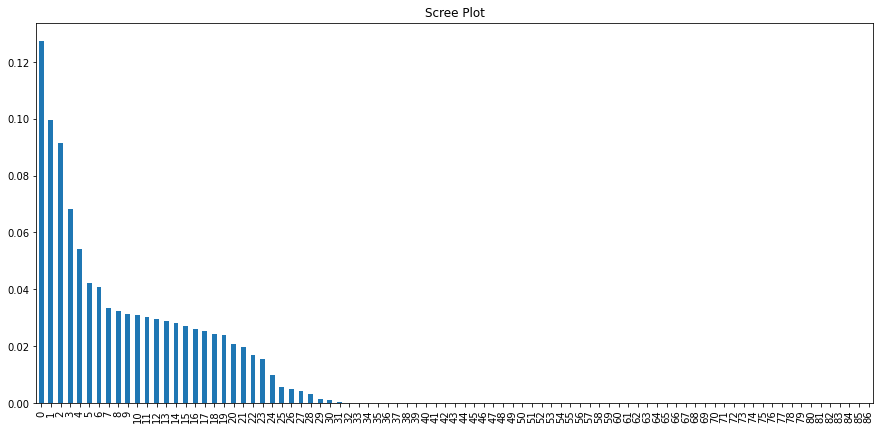

In [64]:
plt.figure(figsize=(15,7))
var_ratio.plot(kind='bar',title='Scree Plot');

In [65]:
#lets check how many components can explain more than 95% variance in data
s=0
for i in range(54):
    if s>.95:
        break
    s+=var_ratio[i]
i,s

(23, 0.9536866067780834)

**Hence it can be seen that 22 components explain more than 95% of variance(Threshold decided for this problem) in data. Therefore, we managed to reduce the number of attributes from 54 to 22 using PCA.** 

###### Getting Covariances between the various attributes.

In [66]:
var_df=pd.DataFrame(pca.get_covariance(),index=x_train.columns,columns=x_train.columns)
var_df#Covariance between different attributes.

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,...,Travel_Controls,Differential_Type,Steering_Controls,Day,Month,Year,Day of the week,Day of the year,Quarter,auctioneerIDis missing,MachineHoursCurrentMeteris missing,fiModelSeriesis missing,fiModelDescriptoris missing,ProductSizeis missing,Drive_Systemis missing,Forksis missing,Pad_Typeis missing,Ride_Controlis missing,Stickis missing,Turbochargedis missing,Blade_Extensionis missing,Blade_Widthis missing,Enclosure_Typeis missing,Engine_Horsepoweris missing,Pushblockis missing,Scarifieris missing,Tip_Controlis missing,Tire_Sizeis missing,Coupleris missing,Coupler_Systemis missing,Grouser_Tracksis missing,Hydraulics_Flowis missing,Track_Typeis missing,Undercarriage_Pad_Widthis missing,Stick_Lengthis missing,Thumbis missing,Pattern_Changeris missing,Grouser_Typeis missing,Differential_Typeis missing,Steering_Controlsis missing
SalesID,1.000014,0.222292,0.122851,0.777661,-0.040175,-0.014289,0.035918,-0.109630,-0.087545,0.127549,-0.004711,0.129730,-0.010808,0.001143,0.038097,3.257346e-18,1.424026e-17,-2.093359e-17,-0.060838,9.981164e-18,-2.242813e-18,5.962315e-18,-1.989918e-18,0.089056,-7.348725e-18,-2.271057e-18,4.985499e-18,1.609507e-18,1.445418e-17,0.053375,2.345596e-18,-0.085277,-3.157553e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.125227,0.000000e+00,0.000000e+00,0.022312,0.121095,0.474059,-0.093424,0.123410,0.110771,0.110741,-0.343907,-0.020241,-0.125425,0.036671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MachineID,0.222292,1.000014,0.175852,0.261824,-0.011603,-0.075083,0.009285,-0.262841,-0.197363,-0.112368,-0.178355,-0.260808,-0.124049,0.093486,0.034035,5.655220e-17,-5.148016e-17,5.273682e-17,0.016488,7.790297e-19,1.568861e-17,-2.684306e-18,3.395870e-19,0.160323,-1.503590e-17,8.371195e-18,4.161255e-18,4.012502e-18,2.271441e-17,-0.214077,-1.677368e-17,-0.064807,-5.227368e-21,2.218332e-61,-3.700695e-62,9.148884e-62,-7.311907e-62,1.335266e-61,9.541970e-62,-3.656910e-62,...,0.195735,-1.377314e-61,-5.153507e-62,-0.004492,0.037832,0.005436,-0.037073,0.037623,0.033592,0.179381,-0.058346,0.103232,0.227565,0.075467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ModelID,0.122851,0.175852,1.000014,0.088315,-0.020660,-0.052465,0.019255,-0.257221,-0.228261,0.056054,0.061476,0.092477,-0.087778,0.063675,0.002141,1.650966e-16,-1.134121e-16,1.552745e-16,-0.007637,-4.083436e-17,-7.982402e-18,3.390656e-17,-1.399313e-17,-0.022257,-5.387367e-17,3.873065e-17,-3.603691e-17,7.242140e-18,6.713397e-17,-0.060987,-5.583612e-17,-0.030033,-1.524240e-18,-8.956209e-61,-9.451901e-63,-3.154789e-61,4.118458e-61,-5.943266e-61,-3.898249e-61,6.007685e-62,...,0.058655,6.482765e-61,2.424861e-61,0.007440,0.008613,0.156276,-0.014963,0.009280,0.008419,0.082491,-0.148229,-0.017188,-0.057095,0.105570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
datasource,0.777661,0.261824,0.088315,1.000014,-0.028522,0.083226,0.037125,-0.040696,-0.034794,0.081968,-0.001065,0.106765,0.030653,-0.024341,0.038094,2.501471e-17,1.703647e-17,-9.080876e-18,-0.080978,5.566553e-18,-4.750996e-18,-6.825058e-18,-4.583650e-18,0.187309,-1.264737e-18,-7.287007e-18,-1.681431e-18,9.641765e-19,1.570406e-17,0.037929,-4.110679e-18,-0.130384,7.929697e-19,2.

**Now lets apply PCA with n_components=23 and transform our data.**

In [67]:
pca=PCA(n_components=23)
x_train_pca=pca.fit_transform(x_train_pca)
x_valid_pca=pca.transform(x_valid_pca)
x_test_pca=pca.transform(x_test_pca)

In [68]:
x_train_pca.shape,x_test_pca.shape,x_valid_pca.shape

((72827, 23), (1998, 23), (1977, 23))

**Hence all the data sets have finally been reduced to 22 columns from 54.This will help make computation faster without significant loss in information.**

# 4. Modelling

Now that we have preprocessed the data and scaled and applied dimensionality reduction techniques. we can began modelling data.
For this we are going to use 4 machine learning models and try and evaluate them to see which fis better and then we will tune the hyperparameters of each model to get better result.

The 4 Models to be used are :

   **1.Random Forest Regressor -** 
    A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
    
   **2.SGD Regressor-**
    SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).
    
   **3.Elastic Net linear regressor -**
    ElasticNet is a linear regression model trained with both l1 and l2-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of l1 and l2 using the l1_ratio parameter.Elastic-net is useful when there are multiple features which are correlated with one another.
  **4.XGBoost Regressor -**
  XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

**Let's start by making baseline models and use score metric as r^2 for start.**

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,SGDRegressor

For Random Forest we will check whether it works better with PCA or without it.

In [70]:
# #Random forest regressor with PCA
# base_rfr=RandomForestRegressor(n_jobs=-1)
# base_rfr.fit(x_train_pca,y_train)
# base_rfr.score(x_train_pca,y_train)
# 0.9538276356441373

In [71]:
# #validation score for RFR
# base_rfr.score(x_valid_pca,y_valid)#seems overfitting.
# 0.4270770705809095

In [72]:
#Random forest without PCA
base_rfr=RandomForestRegressor(random_state=2,n_jobs=-1)
base_rfr.fit(x_train,y_train)
base_rfr.score(x_train,y_train)

0.983862882610216

In [73]:
base_rfr.score(x_valid,y_valid)#Much better without PCA

0.8301737421191161

**Since Random forest is working better without PCA we will will use feature_importances attribute of random forests to reduce dimensionality of data**

In [74]:
feat_imp=pd.Series(base_rfr.feature_importances_,index=x_train.columns).sort_values(ascending=False)

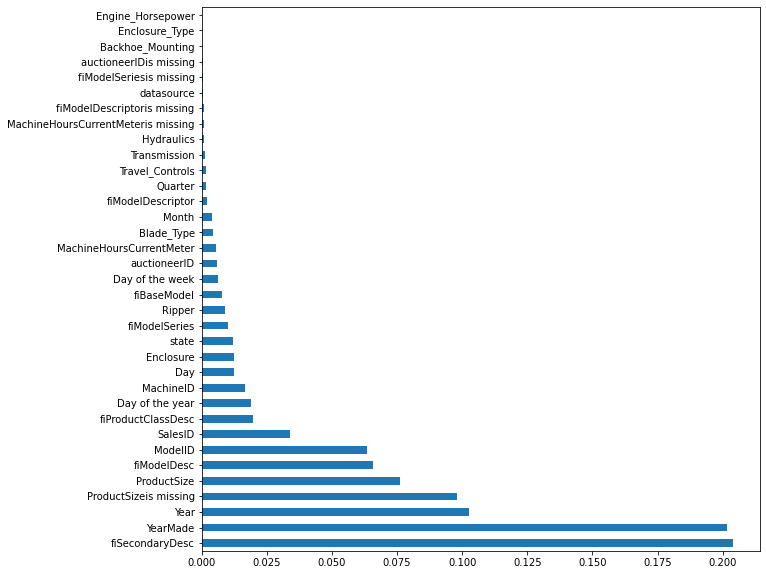

In [75]:
plt.figure(figsize=(10,10))
feat_imp[:35].plot(kind='barh')
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/random forest important features')

**It seems that only 25 features are important to descibe the training data.Hence we will use thode features and discard the rest.**

In [76]:
imp=feat_imp.index[:25]

In [77]:
new_x_train=x_train[imp]
new_x_valid=x_valid[imp]
new_x_test=x_test[imp]

In [78]:
new_x_train.shape,new_x_valid.shape,new_x_test.shape

((72827, 25), (1977, 25), (1998, 25))

In [79]:
# #lets chk if our model works fine or not
# base_rfr=RandomForestRegressor(n_jobs=-1,random_state=2)
# base_rfr.fit(new_x_train,y_train)
# base_rfr.score(new_x_train,y_train)
##0.9838801591554877

In [80]:
# base_rfr.score(new_x_valid,y_valid)#working fine
##0.8301574744843796

**Hence we have managed to reduce the dimensionality of data using random forests and it is working better than PCA.**

In [81]:
# #lets see how SGD works with normal data set
# base_sgd=SGDRegressor()
# base_sgd.fit(x_train,y_train)
# base_sgd.score(x_train,y_train),base_sgd.score(x_valid,y_valid)#Not good
#(-6.769434196743452e+31, -1.1374609101545223e+32)

In [82]:
# #lets see How SGD works with new data including important features from random forests
# base_sgd=SGDRegressor()
# base_sgd.fit(new_x_train,y_train)
# base_sgd.score(new_x_train,y_train),base_sgd.score(new_x_valid,y_valid)#still bad
#(-1.2109022880905257e+33, -1.508156953289989e+33)

In [83]:
# #lets see how Elastic Net fares
# base_en=ElasticNet(random_state=2)
# base_en.fit(x_train,y_train)
# base_en.score(x_train,y_train),base_en.score(x_valid,y_valid)#better than sgd but still less than RF
#(0.4279918969248554, 0.46502531628774035)

In [84]:
# #Lets how EN fares with new data set with important features
# base_en=ElasticNet(random_state=2)
# base_en.fit(new_x_train,y_train)
# base_en.score(new_x_train,y_train),base_en.score(new_x_valid,y_valid)#Almost same
#(0.4265024804840729, 0.4581075360956762)

Now, for Linear regresssors it is better to use polynomial features for better fit of real life data.We are also using Data whose dimensionality has been used using feature imporatnces.

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly=PolynomialFeatures(2)
poly.fit(new_x_train)
poly_xt=poly.transform(new_x_train)
poly_xv=poly.transform(new_x_valid)
poly_xtest=poly.transform(new_x_test)

In [87]:
# #SGD regressor with polynomial features
# base_sgd=SGDRegressor()
# base_sgd.fit(poly_xt,y_train)
# base_sgd.score(poly_xt,y_train)#still doesnt works
# -7.582707108011445e+57

In [88]:
# #Validation score for SGD
# base_sgd.score(poly_xv,y_valid)#still doesnt works
# -7.78381910114154e+58

**It seems that sgd regressor is not good for this problem hence we will not use it.**

In [89]:
# #Elastic net 
# base_en=ElasticNet()
# base_en.fit(poly_xt,y_train)
# base_en.score(poly_xt,y_train)#Much better with polynomial features
##0.5949622539087231

In [90]:
#validation score for elastic net
#base_en.score(poly_xv,y_valid)
##0.6211078702049382

**Lets see if it gives better results with PCA or not**

In [91]:
# poly=PolynomialFeatures(2)
# poly.fit(x_train_pca)
# poly_xt_pca=poly.transform(x_train_pca)
# poly_xv_pca=poly.transform(x_valid_pca)

In [92]:
# base_en=ElasticNet()
# base_en.fit(poly_xt_pca,y_train)
# base_en.score(poly_xt_pca,y_train),base_en.score(poly_xv_pca,y_valid)#Not better with PCA
#(0.5144744353972847, 0.45934437930705885)

After Experimenting, The Elastic net regressor with feature importance dimensionality reduction technique and polynomial features of degree=2 seems to be working but not as good as random forest.May be after further hypertuning it may perform well.

**Hence, Data used from now on is data with dimension reduced using feature importances.**

**It seems for baseline model Random forest is way ahead of SGD and Elastic net models.But maybe after some hyperparameters tuning and using diferent metrics they will improve.SGD model is useless for this problem.Elastic Net works but not as good as RF.**

In [93]:
##Modelling using Gradient boosted trees with XGboost

In [94]:
from xgboost import XGBRegressor

In [95]:
base_xg=XGBRegressor()
base_xg.fit(x_train,y_train)
base_xg.score(x_train,y_train),base_xg.score(x_valid,y_valid)

[13:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.8019083862134299, 0.7856438115803874)

In [96]:
base_xg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

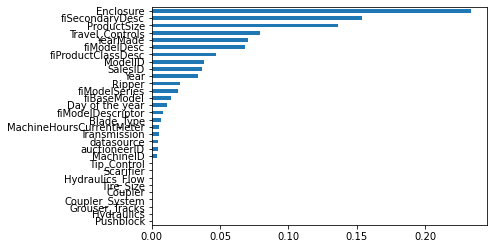

In [97]:
xg_feat_imp=pd.Series(base_xg.feature_importances_,index=x_train.columns).sort_values()
xg_feat_imp[-30:].plot(kind='barh')
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/xgboost important features.png')

In [98]:
xg_feat_imp[-25:].sum()#it seems 25 features are enough for modellingusing xgboost

1.0

In [99]:
xg_imp=xg_feat_imp.index[-25:]
xg_train=x_train[xg_imp]
xg_valid=x_valid[xg_imp]
xg_test=x_test[xg_imp]

In [100]:
# base_xg=XGBRegressor(random_state=2,n_jobs=-1)
# base_xg.fit(xg_train,y_train)
# base_xg.score(xg_train,y_train),base_xg.score(xg_valid,y_valid)
# #(0.9108609815202402, 0.8401985892045856)

# 5.Evaluation

**Lets a create custom evaluation function for evaluation with following metrics:-**
    
    1.R^2
    2.Mean Absolute Error
    3.Root Mean squared error
    4.Root mean squred log error

In [101]:
#importing scoring parameters
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, mean_squared_log_error

In [102]:
def evaluate(y_preds_t,y_preds_v):
    y_preds_t,y_preds_v=abs(y_preds_t),abs(y_preds_v)
    return pd.DataFrame({'r^2 score Training':r2_score(y_train,y_preds_t),
                         'MAE Training':mean_absolute_error(y_train,y_preds_t),
            'RMSE Training':np.sqrt(mean_squared_error(y_train,y_preds_t)),
            'RMSLE Training':np.sqrt(mean_squared_log_error(y_train,y_preds_t)),
           'r^2 score Valid':r2_score(y_valid,y_preds_v),
                         'MAE Valid':mean_absolute_error(y_valid,y_preds_v),
            'RMSE Valid':np.sqrt(mean_squared_error(y_valid,y_preds_v)),
            'RMSLE Valid':np.sqrt(mean_squared_log_error(y_valid,y_preds_v))},index=['Values']).T

In [103]:
# evaluate(base_rfr.predict(new_x_train),base_rfr.predict(new_x_valid))#testing the evaluation function

In [104]:
#evaluate(base_en.predict(poly_xt),base_en.predict(poly_xv))

In [105]:
# #evaluate xgboost
# evaluate(base_xg.predict(xg_train),base_xg.predict(xg_valid))

# 6. Hyperparameters Tuning

**The base line models dont perform very well hence we have to do some hyperparameters tuning. Hence we will use:-**
    
    1.RandomSearchCV- randomly search for best hyperparametrs
    2.GridSearchCV- exhaustive search for best hyper parameters


In [106]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [107]:
# # Tuning of random forest function
# param_grid={'n_estimators':np.arange(20,200,20),
#            'max_depth':[None,5,10,15,20],
#            'min_samples_split':np.arange(2,20,2),
#            'criterion':['mae','mse'],
#            'min_samples_leaf':np.arange(1,20,2),
#            'max_samples':[10000],
#            'random_state':[2]}
# rs_rfr=RandomizedSearchCV(estimator=RandomForestRegressor(),
#                          param_distributions=param_grid,
#                          n_iter=50,
#                          random_state=2,
#                          n_jobs=-1,
#                          cv=3)
# rs_rfr.fit(new_x_train,y_train) 

In [108]:
# rs_rfr.best_params_
# # {'random_state': 2,
# #  'n_estimators': 160,
# #  'min_samples_split': 10,
# #  'min_samples_leaf': 1,
# #  'max_samples': 10000,
# #  'max_depth': 20,
# #  'criterion': 'mae'}

In [109]:
#pd.DataFrame(rs_rfr.cv_results_).sort_values('rank_test_score')

In [110]:
param_grid={'n_estimators':[150,160,170],
           'max_depth':[20,25],
           'min_samples_split':[8,10,12],
           'min_samples_leaf':[1,2],
           'max_samples':[10000],
           'random_state':[2]}

In [111]:
# #now lets do more refined search usich Grid Search cv after narrowing the search using randomized search cv
# gs_rfr=GridSearchCV(estimator=RandomForestRegressor(),
#                    param_grid=param_grid,
#                    cv=3,
#                    n_jobs=-1)
# gs_rfr.fit(new_x_train,y_train)
# gs_rfr.best_params_
# # {'max_depth': 25,
# #  'max_samples': 10000,
# #  'min_samples_leaf': 2,
# #  'min_samples_split': 10,
# #  'n_estimators': 160,
# #  'random_state': 2}

In [112]:
# #refine it more with max_depth
# param_grid={'max_depth':[25,30,35,45,50,80,100,None],
#            'max_samples':[10000],
#            'random_state':[2]}
# gs_rfr=GridSearchCV(estimator=RandomForestRegressor(),
#                    param_grid=param_grid,
#                    cv=3,
#                    n_jobs=-1)
# gs_rfr.fit(new_x_train,y_train)
# gs_rfr.best_params_
# #{'max_depth': 35, 'max_samples': 10000, 'random_state': 2}

In [113]:
# #tuning of Elastic Net
# param_grid={'alpha':np.geomspace(1e-5,1,num=5),
#            'l1_ratio':np.linspace(0,1,num=5),
#            'random_state':[2],
#            'tol':[1e-3,1e-2]}
# rs_en=RandomizedSearchCV(estimator=ElasticNet(),
#                         param_distributions=param_grid,
#                         n_iter=25,
#                         cv=3,
#                         n_jobs=-1,
#                         random_state=2)
# rs_en.fit(poly_xt,y_train)
# rs_en.best_params_
# # {'tol': 0.001,
# #  'random_state': 2,
# #  'l1_ratio': 0.5,
# #  'alpha': 0.00017782794100389227}


In [114]:
#pd.DataFrame(rs_en.cv_results_).sort_values('rank_test_score')

**All the search search for optimizing the model has been done.Hence now models with best parameters found will be trained.** 

In [115]:
# #Random forest
# #{'max_depth': 35,
# #  'min_samples_leaf': 2,
# #  'min_samples_split': 10,
# #  'n_estimators': 160,
# #  'random_state': 2}
# final_rfr=RandomForestRegressor(n_estimators=160,min_samples_leaf=2,min_samples_split=10,max_depth=35,random_state=2,n_jobs=-1)
# final_rfr.fit(new_x_train,y_train)
# final_rfr.score(new_x_train,y_train),final_rfr.score(new_x_valid,y_valid)

In [116]:
# #evaluting RF
# evaluate(final_rfr.predict(new_x_train),final_rfr.predict(new_x_valid))

**Even though score are almost same from baseline model,overfitting has been reduced making the model more generalized.**

In [117]:
# # #Elastic net
# # {'tol': 0.001,
# #  'random_state': 2,
# #  'l1_ratio': 0.5,
# #  'alpha': 0.00017782794100389227}
# final_en=ElasticNet(max_iter=100000,alpha=0.000178,l1_ratio=0.5,tol=0.001,random_state=2)
# final_en.fit(poly_xt,y_train)
# final_en.score(poly_xt,y_train),final_en.score(poly_xv,y_valid)
# #(0.713734056377292, 0.7272504008885198)

In [118]:
# #Evaluate final EN
# evaluate(final_en.predict(poly_xt),final_en.predict(poly_xv))

**We were able to improve regression model very much but still it is very much behind random forest model.**

In [119]:
# Hyperprameters tuning of xgboost
param_grid={"learning_rate"    : [0.10, 0.20, 0.30,0.40,0.50 ] ,
           'n_estimators':np.arange(100,300,20),
           'max_depth':[7,9,11],
            'random_state':[2],
           'booster':['gbtree'],
           }

In [120]:
# gs_xg=GridSearchCV(estimator=XGBRegressor(),
#                   param_grid=param_grid,
#                   cv=3,
#                   n_jobs=-1)
# gs_xg.fit(xg_train,y_train)
# gs_xg.best_params_
# # {'booster': 'gbtree',
# #  'learning_rate': 0.1,
# #  'max_depth': 7,
# #  'n_estimators': 280,
# #  'random_state': 2}

In [121]:
# param_grid2={"learning_rate"    : [0.01,0.05,0.10,0.15 ] ,
#            'n_estimators':[280,300,320],
#            'max_depth':[5,6,7],
#             'random_state':[2],
#            'booster':['gbtree'],
#            }
# gs_xg=GridSearchCV(estimator=XGBRegressor(),
#                   param_grid=param_grid2,
#                   cv=3,
#                   n_jobs=-1)
# gs_xg.fit(xg_train,y_train)
# gs_xg.best_params_
# # {'booster': 'gbtree',
# #  'learning_rate': 0.15,
# #  'max_depth': 7,
# #  'n_estimators': 320,
# #  'random_state': 2}

In [122]:
# param_grid3={"learning_rate"    : [0.15 ] ,
#            'n_estimators':[320,350],
#            'max_depth':[7],
#              'colsample_bytree':[0.4,0.6,0.8],
#              'min_child_weight':[1,3,5],
#              'gamma':[0,0.4,0.6,1],
#             'random_state':[2],
#            'booster':['gbtree'],
#            }
# gs_xg=GridSearchCV(estimator=XGBRegressor(),
#                   param_grid=param_grid3,
#                   cv=3,
#                   n_jobs=-1)
# gs_xg.fit(xg_train,y_train)
# gs_xg.best_params_
# # {'booster': 'gbtree',
# #  'colsample_bytree': 0.6,
# #  'gamma': 0,
# #  'learning_rate': 0.15,
# #  'max_depth': 7,
# #  'min_child_weight': 3,
# #  'n_estimators': 350,
# #  'random_state': 2}

In [123]:
# param_grid4={"learning_rate"    : [0.15 ] ,
#            'n_estimators':[350,400,450,500],
#            'max_depth':[7],
#              'colsample_bytree':[0.6],
#              'min_child_weight':[3],
#              'gamma':[0],
#             'random_state':[2],
#            'booster':['gbtree'],
#            }
# gs_xg=GridSearchCV(estimator=XGBRegressor(),
#                   param_grid=param_grid4,
#                   cv=3,
#                   n_jobs=-1)
# gs_xg.fit(xg_train,y_train)
# gs_xg.best_params_
# # {'booster': 'gbtree',
# #  'colsample_bytree': 0.6,
# #  'gamma': 0,
# #  'learning_rate': 0.15,
# #  'max_depth': 7,
# #  'min_child_weight': 3,
# #  'n_estimators': 450,
# #  'random_state': 2}

In [124]:
# #final XGBoost model
# final_xg=XGBRegressor(booster='gbtree',colsample_bytree=0.6,gamma=0,learning_rate=0.15,max_depth=7,min_child_weight=3,n_estimators=450,random_state=2,n_jobs=-1)
# final_xg.fit(xg_train,y_train)
# evaluate(final_xg.predict(xg_train),final_xg.predict(xg_valid))

[13:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Values
r^2 score Training,0.944957
MAE Training,4024.367601
RMSE Training,5772.206115
RMSLE Training,0.170731
r^2 score Valid,0.841673
MAE Valid,7708.055196
RMSE Valid,11111.073584
RMSLE Valid,0.276091


# 7. Saving the Models

In [125]:
import pickle
from xgboost import Booster

In [126]:
# #Saving the final models

# pickle.dump(base_rfr,open('models/base_rfr.pkl','wb'))
# pickle.dump(base_en,open('models/base_en.pkl','wb'))
# pickle.dump(final_rfr,open('models/final_rfr.pkl','wb'))
# pickle.dump(final_en,open('models/final_en.pkl','wb'))
# pickle.dump(base_xg,open('/content/drive/MyDrive/Regression_project_Bulldozers_price/models/base_xg.pkl','wb'))
# pickle.dump(final_xg,open('/content/drive/MyDrive/Regression_project_Bulldozers_price/models/final_xg.pkl','wb'))

In [127]:
#loading the models
base_rfr=pickle.load(open('/content/drive/MyDrive/Regression_project_Bulldozers_price/models/base_rfr.pkl','rb'))
base_en=pickle.load(open('/content/drive/MyDrive/Regression_project_Bulldozers_price/models/base_en.pkl','rb'))



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [128]:
final_rfr=pickle.load(open('/content/drive/MyDrive/Regression_project_Bulldozers_price/models/final_rfr.pkl','rb'))
final_en=pickle.load(open('/content/drive/MyDrive/Regression_project_Bulldozers_price/models/final_en.pkl','rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [129]:
base_xg=pickle.load(open('/content/drive/MyDrive/Regression_project_Bulldozers_price/models/base_xg.pkl','rb'))
final_xg=pickle.load(open('/content/drive/MyDrive/Regression_project_Bulldozers_price/models/final_xg.pkl','rb'))

[13:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [130]:
#chk for iprovements
#Random forest
(final_rfr.score(new_x_valid,y_valid)-base_rfr.score(new_x_valid,y_valid))/base_rfr.score(new_x_valid,y_valid)*100

0.4662721482877682

In [131]:
(final_en.score(poly_xv,y_valid)-base_en.score(poly_xv,y_valid))/base_en.score(poly_xv,y_valid)*100

17.08922648952575

In [133]:
#(final_xg.score(xg_valid,y_valid)-base_xg.score(xg_valid,y_valid))/base_xg.score(xg_valid,y_valid)*100

The Random forest model saw an improvement of only **0.47%** an the elastic net model saw an improvement of **17.09%** but Xgboost score decreased by **0.27%** although its it fitted the training much better which may have leaad to slight overfitting..

In [134]:
#evaluate models
#Random Forest
evaluate(final_rfr.predict(new_x_train),final_rfr.predict(new_x_valid))

,Values
r^2 score Training,0.955264
MAE Training,3329.113270
RMSE Training,5203.794413
RMSLE Training,0.137149
r^2 score Valid,0.834028
MAE Valid,7847.846671
RMSE Valid,11376.170327
RMSLE Valid,0.270948


In [135]:
#Elastic net
evaluate(final_en.predict(poly_xt),final_en.predict(poly_xv))

,Values
r^2 score Training,0.722584
MAE Training,9243.594179
RMSE Training,12958.548598
RMSLE Training,0.433200
r^2 score Valid,0.729271
MAE Valid,10459.517709
RMSE Valid,14529.348700
RMSLE Valid,0.508038


In [144]:
#xg_boost
from xgboost import DMatrix
evaluate(final_xg.predict(DMatrix(xg_train)),final_xg.predict(DMatrix(xg_valid)))

,Values
r^2 score Training,0.944957
MAE Training,4024.367601
RMSE Training,5772.206115
RMSLE Training,0.170731
r^2 score Valid,0.841673
MAE Valid,7708.055196
RMSE Valid,11111.073584
RMSLE Valid,0.276091


# 8. Predictions on Test Set and Evaluation

**For final prediction on test set Random forest is chosen as it out-performs Elastic net model.** 

In [138]:
y_test_preds=final_rfr.predict(new_x_test)

In [139]:
test=pd.DataFrame({'SalesID':new_x_test['SalesID'],'Benchmark values':y_test,'Predicted values':y_test_preds}).reset_index(drop=True)

In [140]:
test.head()

,SalesID,Benchmark values,Predicted values
0,4325988,17025.0,17627.252958
1,4285836,77470.0,84720.241914
2,4323706,17650.0,19666.776789
3,4258743,97340.0,90458.817191
4,4272082,19240.0,20081.980540


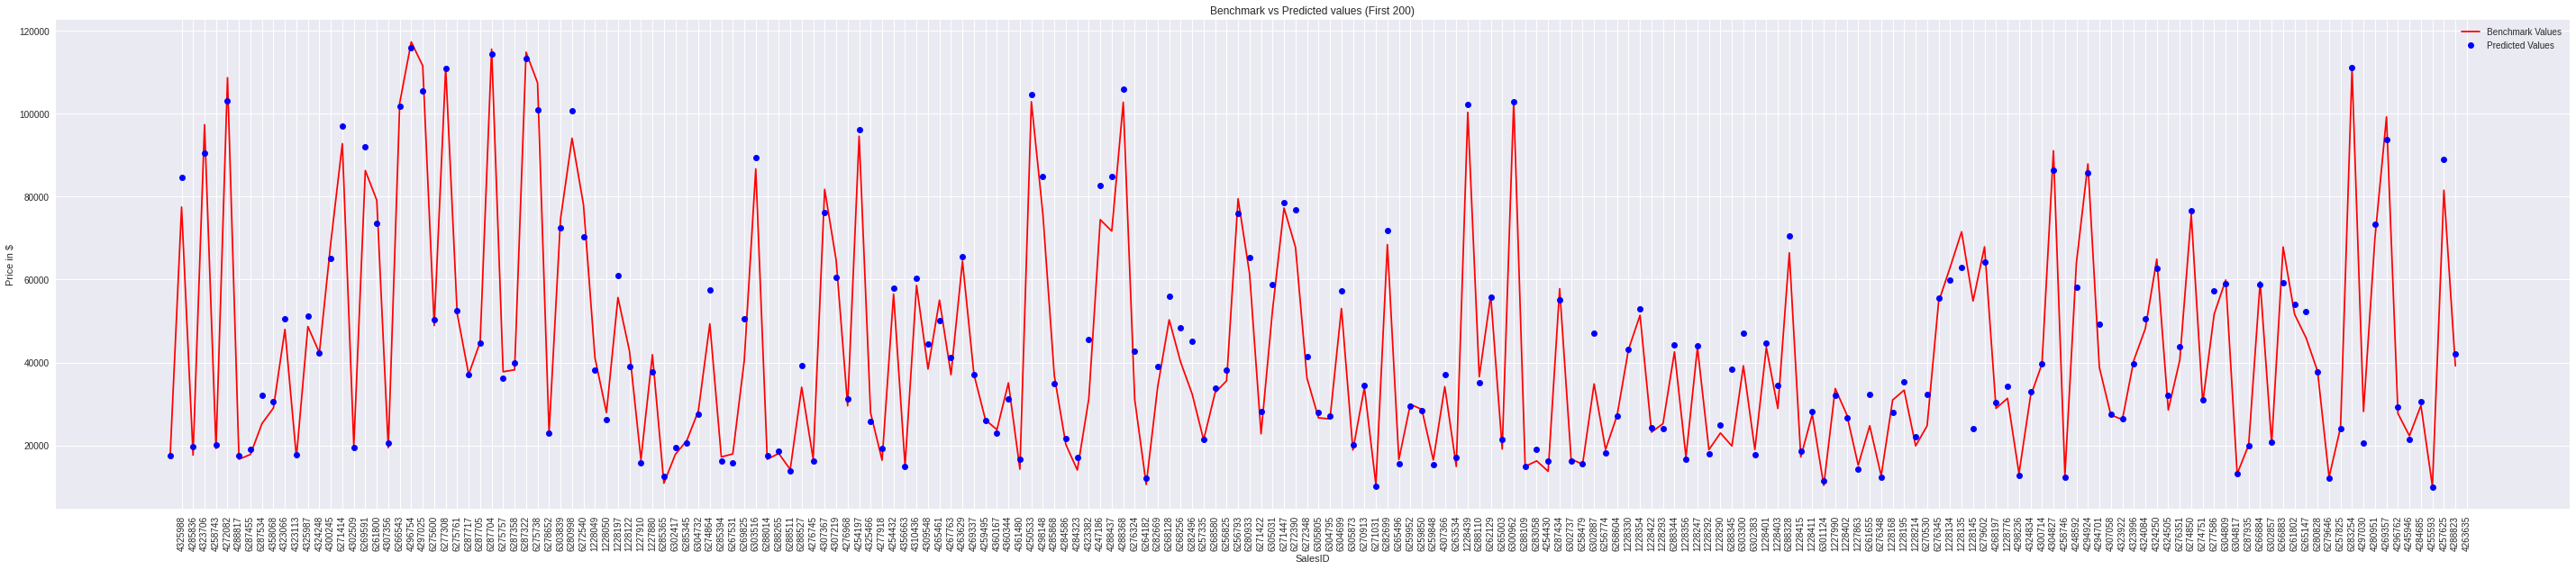

In [141]:
plt.style.use('seaborn')
plt.figure(figsize=(50,10))
plt.plot(test['Benchmark values'][:200],'r',label='Benchmark Values')
plt.plot(test['Predicted values'][:200],'bo',label='Predicted Values')
plt.gca().set(title='Benchmark vs Predicted values (First 200)',xlabel='SalesID',ylabel='Price in $',xticks=np.arange(1,201))
plt.gca().set_xticklabels(test.SalesID[:200],rotation=90)
plt.legend(loc=1)
plt.savefig('/content/drive/MyDrive/Regression_project_Bulldozers_price/Graphs/Bench vs Pred for test (first 200)')

In [142]:
#Lets check the performance of The model against the benchmark
from sklearn.metrics import mean_absolute_error
pd.DataFrame({'r^2 score Test':r2_score(y_test,y_test_preds),
              'MAE test':mean_absolute_error(y_test,y_test_preds),
            'RMSE Test':np.sqrt(mean_squared_error(y_test,y_test_preds)),
            'RMSLE Test':np.sqrt(mean_squared_log_error(y_test,y_test_preds))},index=['Values']).T

,Values
r^2 score Test,0.962619
MAE test,3164.072681
RMSE Test,4760.900407
RMSLE Test,0.124078


In [143]:
#The bench mark results seems good.
#Lets save the result now
test.to_csv('/content/drive/MyDrive/Regression_project_Bulldozers_price/Result/Test Predictions.csv')

In [148]:
df

7        0
11       0
22       0
24       0
25       0
        ..
12412    2
12413    2
12419    2
12420    2
12451    2
Name: set, Length: 76802, dtype: int64

# ----------------------------------------END------------------------------------